In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dictionary_of_rmse_linear = {}
dictionary_of_r2_linear = {}
dictionary_of_rmse_poly = {}
dictionary_of_r2_poly = {}

In [4]:
def poly(name, group):
    # transfrom the date into an integer to be able to fit it into the model
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal) 
    # Create a range to be able to tell the model later to predict within this range. I want to predict for a range that is 10 points more than half the number of observations in input data.
    Range = group['date_transformed'].max() + round(len(group)/2) + 10
    print(name)
    predict_dates = list(range(group['date_transformed'].max() + 1, Range))
    
    # Build the model
    # Make sure to transfrom the input data
    x = group['date_transformed'].values[:,np.newaxis]
    y = group['vaccination_rate'].values
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    # Test the model and its accuracy
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    # Save the predictions as a column of the input data
    group['Pred'] = y_poly_pred
    group_export = group[['date','vaccination_rate','Pred']].set_index('date')
    # View results
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    dictionary_of_rmse_poly[name] = rmse
    dictionary_of_r2_poly[name] = r2
    return model, polynomial_features, predict_dates, group_export

In [5]:
def linear(name, group):
    # transfrom the date into an integer to be able to fit it into the model
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal) 
    # Create a range to be able to tell the model later to predict within this range. I want to predict for a range that is 10 points more than half the number of observations in input data.
    Range = group['date_transformed'].max() + round(len(group)/2) + 10
    predict_dates = list(range(group['date_transformed'].max() + 1, Range))
    
    # Build the model
    # Make sure to transfrom the input data
    x = group['date_transformed'].values[:,np.newaxis]
    y = group['vaccination_rate'].values

    model = LinearRegression()
    model.fit(x, y)
    # Test the model and its accuracy
    y_pred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    # Save the predictions as a column of the input data
    group['Pred'] = y_pred
    group_export = group[['date','vaccination_rate','Pred']].set_index('date')
    # View results
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    dictionary_of_rmse_linear[name] = rmse
    dictionary_of_r2_linear[name] = r2
    return model, 0, predict_dates, group_export

In [6]:
df = pd.read_csv(r'../data/New_York_State_Statewide_COVID-19_Vaccination_Data_by_County.csv')
display(df) 

,Region,County,First Dose,Series Complete,Report as of
0,Capital Region,Albany,72,0,12/14/2020
1,Western New York,Allegany,0,0,12/14/2020
2,New York City,Bronx,2,0,12/14/2020
3,Southern Tier,Broome,0,0,12/14/2020
4,Western New York,Cattaraugus,0,0,12/14/2020
...,...,...,...,...,...
22315,Capital Region,Washington,38990,36323,12/08/2021
22316,Finger Lakes,Wayne,60296,55802,12/08/2021
22317,Mid-Hudson,Westchester,794927,703158,12/08/2021
22318,Finger Lakes,Wyoming,21665,20021,12/08/2021


In [7]:
df.drop(columns = ['Region','County'], inplace = True)
df_by_date = df.groupby(['Report as of'], as_index=False).sum()
display(df_by_date)

,Report as of,First Dose,Series Complete
0,01/01/2021,200799,756
1,01/02/2021,228633,827
2,01/03/2021,235755,883
3,01/04/2021,256150,2009
4,01/05/2021,285890,4938
...,...,...,...
355,12/27/2020,98753,331
356,12/28/2020,114967,402
357,12/29/2020,136590,472
358,12/30/2020,164951,578


In [8]:
df_by_date['Report as of'] = pd.to_datetime(df_by_date['Report as of'])

In [9]:
df_by_date.sort_values(by = 'Report as of', inplace=True)

In [10]:
df_by_date['Series Complete'] = (df_by_date['Series Complete']/20201249)

In [11]:
display(df_by_date)

,Report as of,First Dose,Series Complete
342,2020-12-14,201,0.000000e+00
343,2020-12-15,1603,4.950189e-08
344,2020-12-16,6601,8.910340e-07
345,2020-12-17,12694,1.881072e-06
346,2020-12-18,21211,3.217623e-06
...,...,...,...
337,2021-12-04,14595390,6.492365e-01
338,2021-12-05,14605978,6.499500e-01
339,2021-12-06,14626610,6.509630e-01
340,2021-12-07,14642385,6.517237e-01


In [12]:
df_by_date.drop(columns = ['First Dose'], inplace = True)

In [13]:
df_by_date.rename(columns={'Report as of': 'date', 'Series Complete': 'vaccination_rate'}, inplace=True)

New York
New York
rmse:  0.04213253624248404
r2:  0.9682299060759528


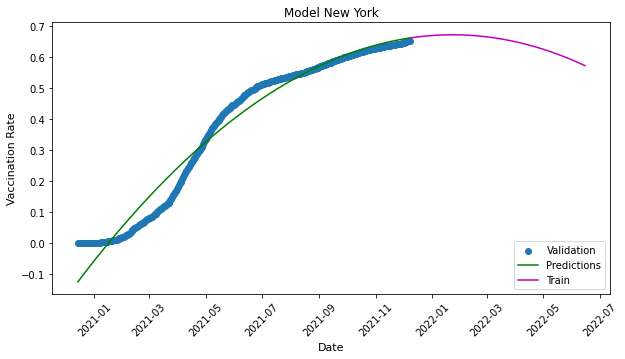

Observations in Actual Data = 360.000000, Predicted Observations=189.000000


In [14]:
model, polynomial_features, predict_dates, group_export = poly('New York', df_by_date)
group_export['Location'] = 'New York'
Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))
Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
Predictions_df['Location'] = 'New York'
# Plot current observed, predicted and future predicted data
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Model ' + 'New York')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Vaccination Rate', fontsize=11)
plt.scatter(group_export.index, group_export['vaccination_rate'])
plt.plot(group_export['Pred'], color = 'g')
plt.plot(Predictions_df[['Predictions']], color = 'm')
plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
plt.show()
    # View the Actual vs Predicted data and their data count
print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(df_by_date), len(Predictions)))

New York
rmse:  0.06311692067409864
r2:  0.9287024021807555


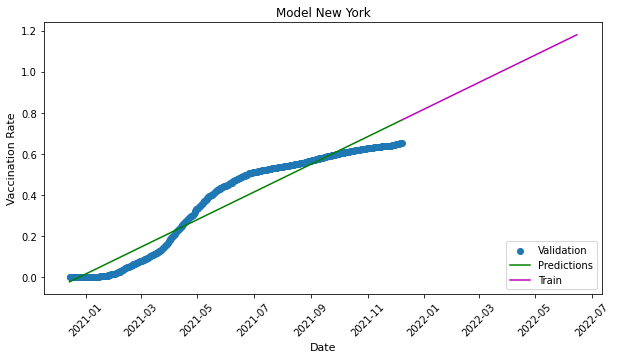

Observations in Actual Data = 360.000000, Predicted Observations=189.000000


In [15]:
model, polynomial_features, predict_dates, group_export = linear('New York', df_by_date)
group_export['Location'] = 'New York'
Predictions = model.predict(np.array(predict_dates).reshape(-1,1))
Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
Predictions_df['Location'] = 'New York'

    # Plot current observed, predicted and future predicted data
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Model ' + 'New York')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Vaccination Rate', fontsize=11)
plt.scatter(group_export.index, group_export['vaccination_rate'])
plt.plot(group_export['Pred'], color = 'g')
plt.plot(Predictions_df[['Predictions']], color = 'm')
plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
plt.show()
    # View the Actual vs Predicted data and their data count
print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(df_by_date), len(Predictions)))

In [16]:
df_all_states = pd.read_csv(r'../data/us_state_vaccinations.csv')
display(df_all_states) 


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,2021-12-04,Wyoming,643976.0,822045.0,313280.0,45.96,111.27,265972.0,54.13,142.04,3472.0,2270.0,3922.0,0.783
21472,2021-12-05,Wyoming,644277.0,821905.0,313458.0,45.97,111.32,266049.0,54.16,142.01,301.0,2111.0,3647.0,0.784
21473,2021-12-06,Wyoming,644324.0,820505.0,313534.0,45.97,111.33,266071.0,54.17,141.77,47.0,1915.0,3309.0,0.785
21474,2021-12-07,Wyoming,650183.0,824405.0,314830.0,46.21,112.34,267460.0,54.40,142.44,5859.0,2482.0,4288.0,0.789


In [17]:
df_all_states = df_all_states[['date','location','people_vaccinated_per_hundred']]
display(df_all_states) 

,date,location,people_vaccinated_per_hundred
0,2021-01-12,Alabama,1.45
1,2021-01-13,Alabama,1.53
2,2021-01-14,Alabama,1.64
3,2021-01-15,Alabama,1.77
4,2021-01-16,Alabama,NaN
...,...,...,...
21471,2021-12-04,Wyoming,54.13
21472,2021-12-05,Wyoming,54.16
21473,2021-12-06,Wyoming,54.17
21474,2021-12-07,Wyoming,54.40


In [18]:
list_of_states = df_all_states['location'].unique().tolist()

Alabama
rmse:  0.03768224631743481
r2:  0.9452735774740225


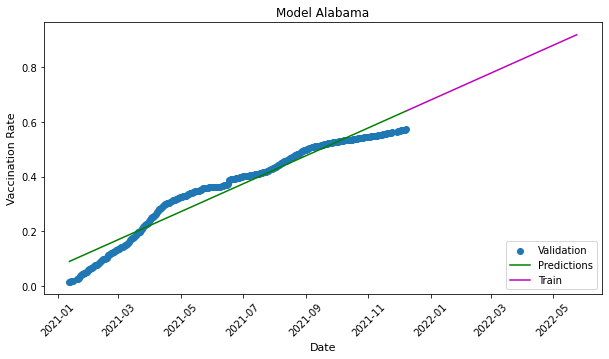

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Alaska
rmse:  0.05015753398820443
r2:  0.8930556292070708


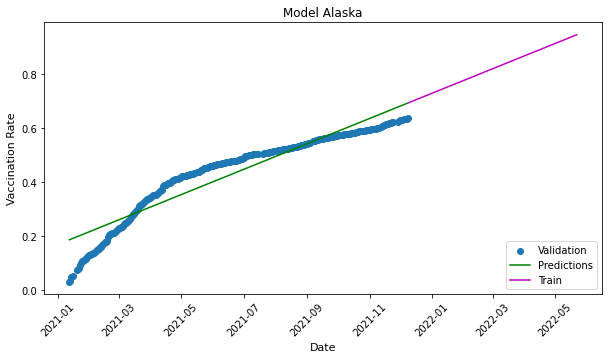

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
American Samoa
rmse:  0.029841143942996803
r2:  0.9715123709202034


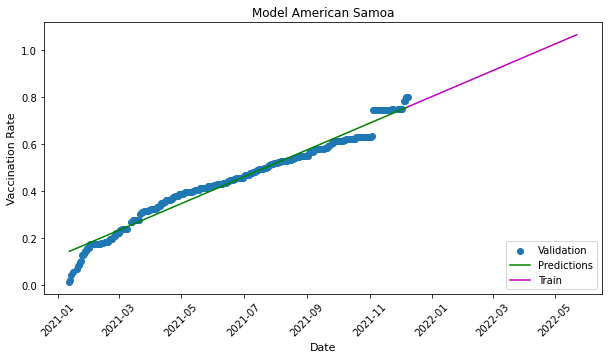

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Arizona
rmse:  0.05897599016259692
r2:  0.8931377835661523


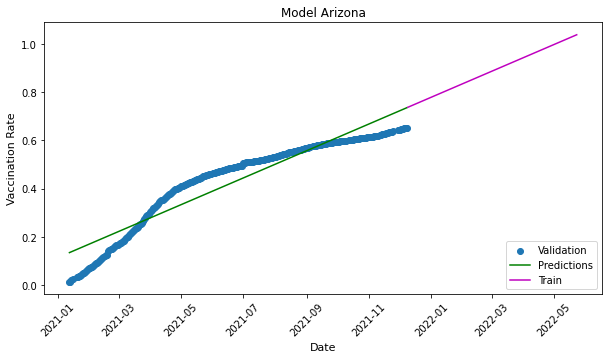

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Arkansas
rmse:  0.04089222804764481
r2:  0.940909708424233


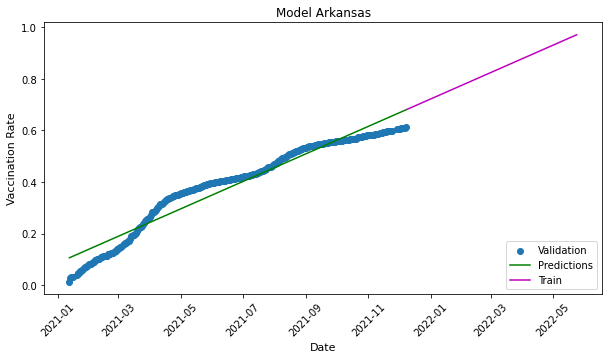

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
California
rmse:  0.07681726887522261
r2:  0.8916333744425551


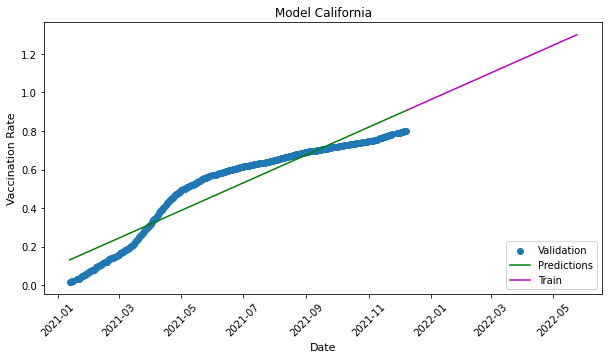

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Colorado
rmse:  0.07568240847006222
r2:  0.8662781354633176


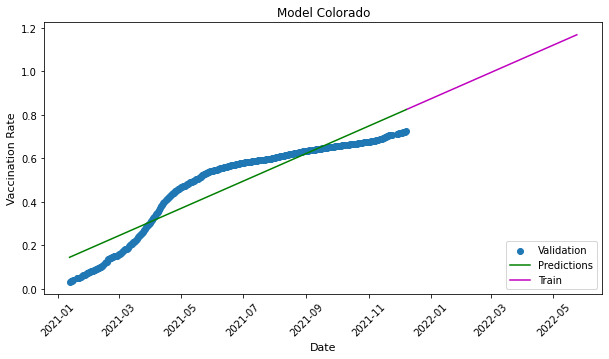

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Connecticut
rmse:  0.08578230157263916
r2:  0.8709489557647363


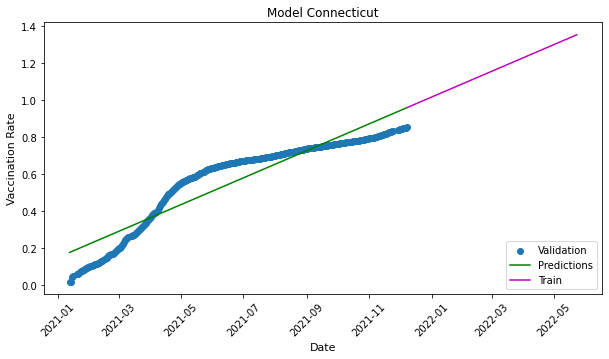

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Delaware
rmse:  0.07497629746186113
r2:  0.8727478524255504


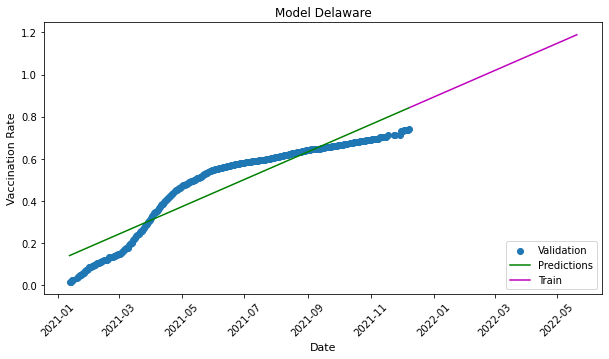

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
District of Columbia
rmse:  0.07626447982368312
r2:  0.8864434834244098


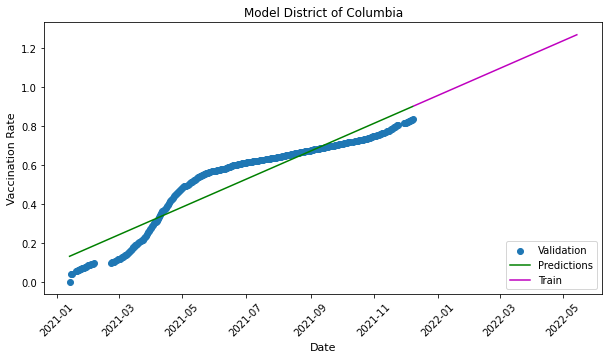

Observations in Actual Data = 360.000000, Predicted Observations=157.000000
Federated States of Micronesia
rmse:  0.015157997172759218
r2:  0.9881626547315918


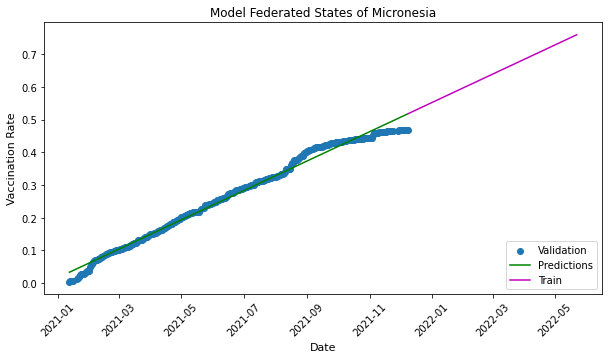

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Florida
rmse:  0.057054239571919865
r2:  0.9257892456276549


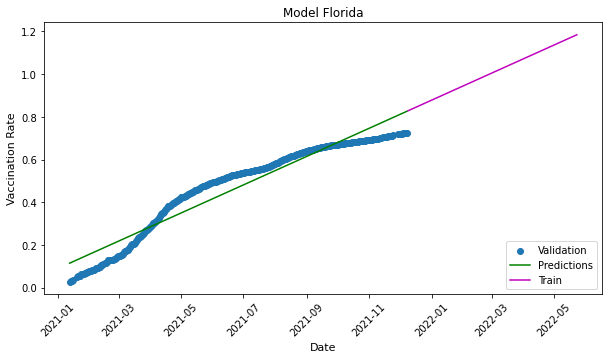

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Georgia
rmse:  0.04524326630721546
r2:  0.929373419280591


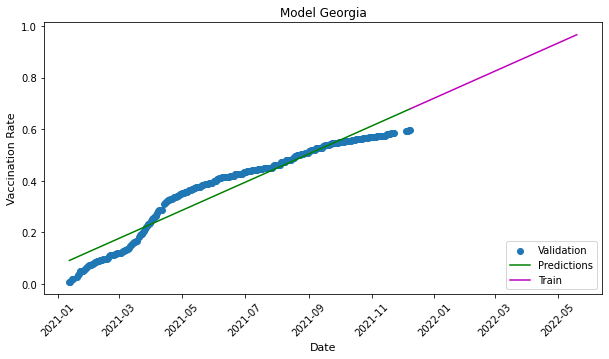

Observations in Actual Data = 360.000000, Predicted Observations=162.000000
Guam
rmse:  0.05904485276481592
r2:  0.9367768699215006


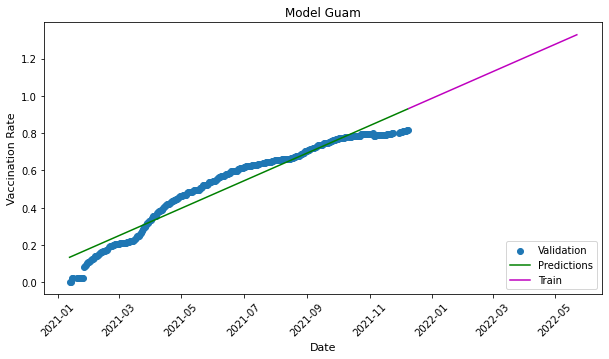

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Hawaii
rmse:  0.09946199632479544
r2:  0.8408017951666905


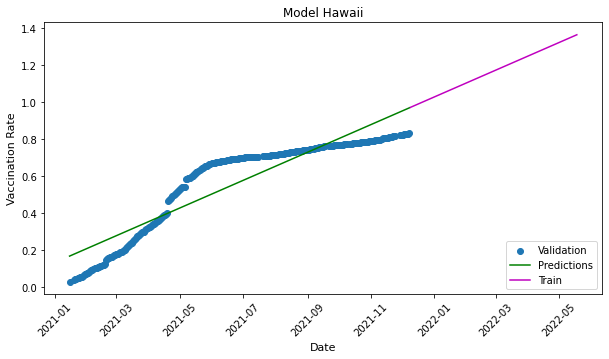

Observations in Actual Data = 360.000000, Predicted Observations=161.000000
Idaho
rmse:  0.04900636908443827
r2:  0.876344048327878


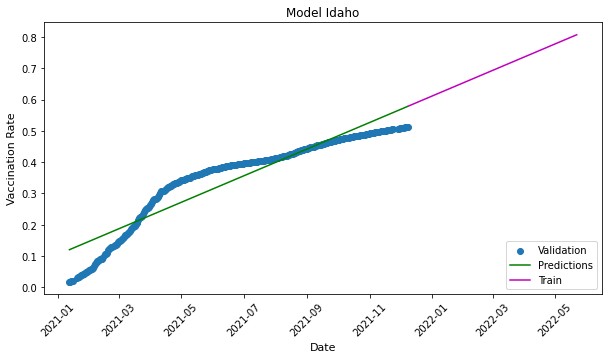

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Illinois
rmse:  0.08832131032579633
r2:  0.8280167880295253


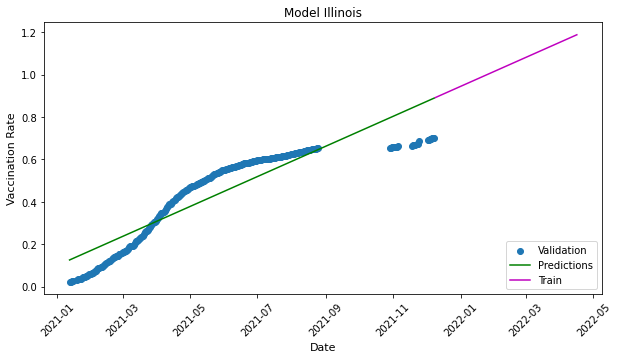

Observations in Actual Data = 360.000000, Predicted Observations=129.000000
Indian Health Svc
rmse:  0.031034569708521274
r2:  0.8467683912237792


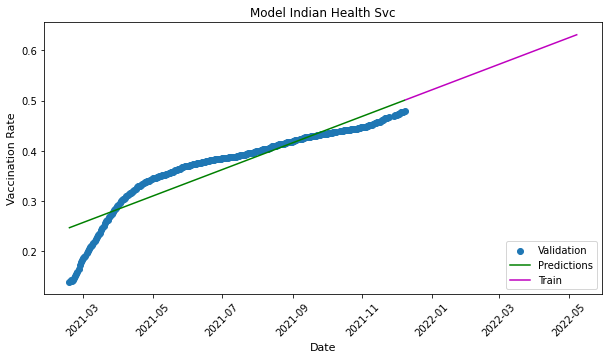

Observations in Actual Data = 360.000000, Predicted Observations=151.000000
Indiana
rmse:  0.05314029886106079
r2:  0.8854073916265416


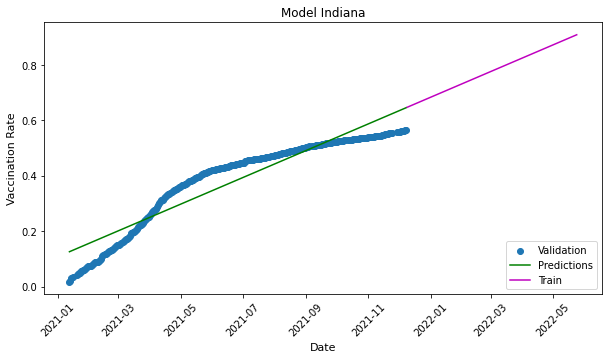

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Iowa
rmse:  0.07173310404689277
r2:  0.8340749036193829


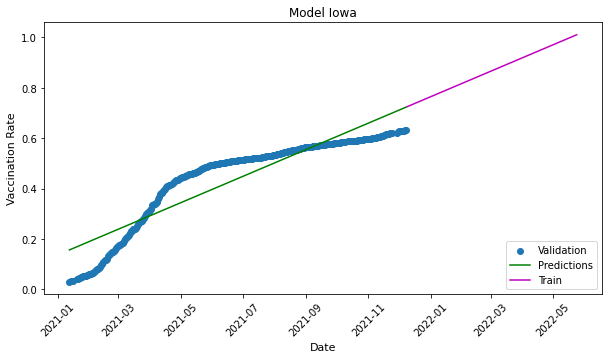

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Kansas
rmse:  0.062442830768712536
r2:  0.8884724779716158


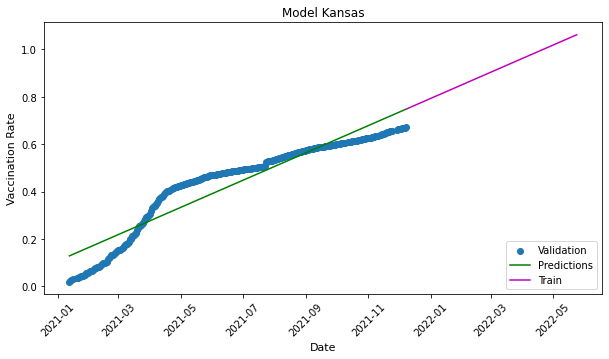

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Kentucky
rmse:  0.07020975627770887
r2:  0.8351744806446224


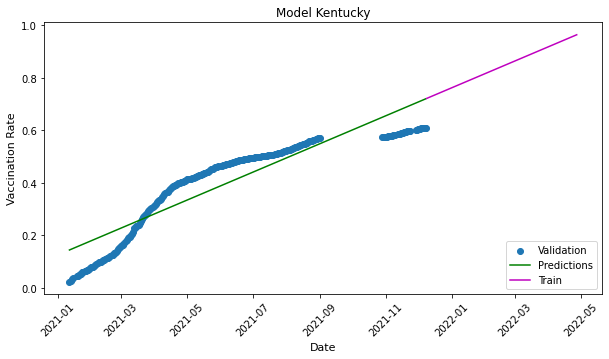

Observations in Actual Data = 360.000000, Predicted Observations=140.000000
Louisiana
rmse:  0.03518918336773921
r2:  0.9459189319395448


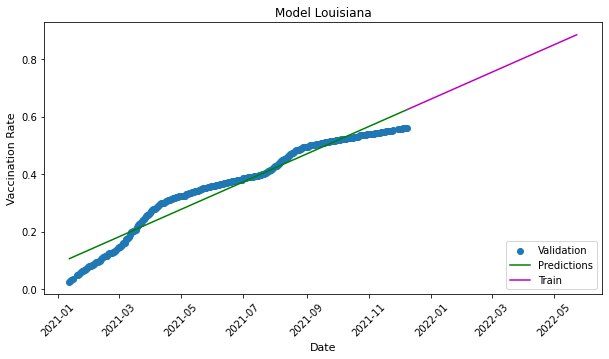

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Maine
rmse:  0.09266277625093605
r2:  0.849493961118509


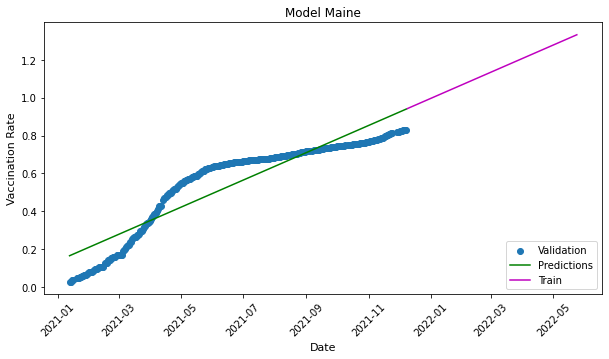

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Marshall Islands
rmse:  0.04598887259051704
r2:  0.7932464920947482


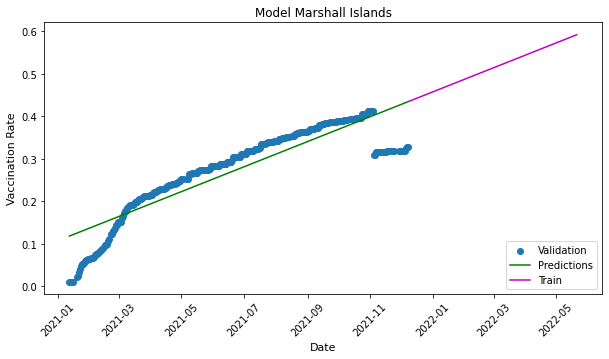

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Maryland
rmse:  0.08166930199253584
r2:  0.8736540324407086


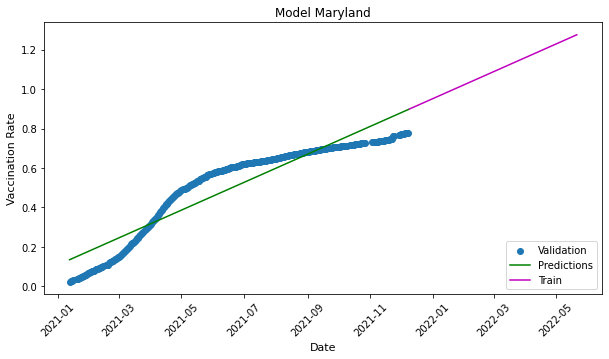

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Massachusetts
rmse:  0.09932350890708304
r2:  0.8481788898331383


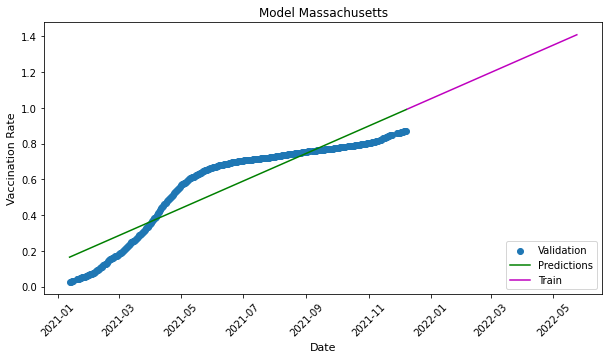

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Michigan
rmse:  0.0719354431797168
r2:  0.8339226760958554


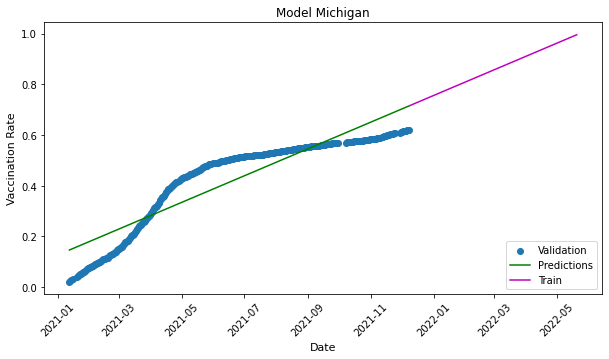

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
Minnesota
rmse:  0.07922336802965856
r2:  0.8419622022159429


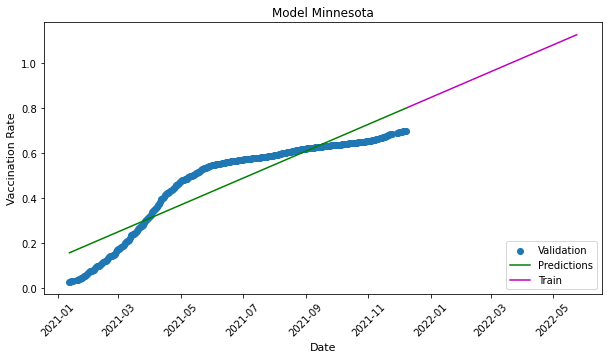

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Mississippi
rmse:  0.032549401169066135
r2:  0.9508507337395145


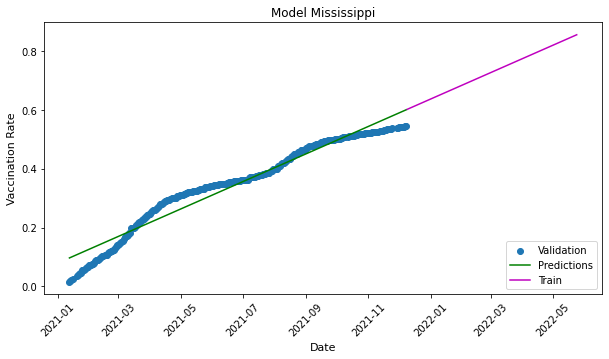

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Missouri
rmse:  0.053343197469097804
r2:  0.9015014375092261


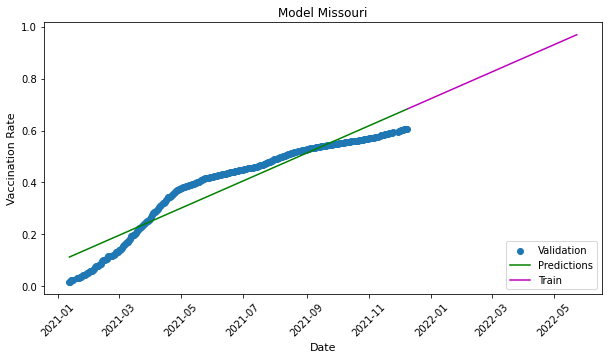

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Montana
rmse:  0.06028406448766144
r2:  0.8595654839993101


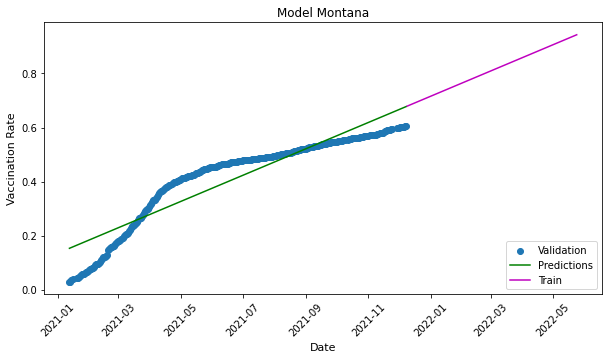

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Nebraska
rmse:  0.06788302560872313
r2:  0.8599147201629407


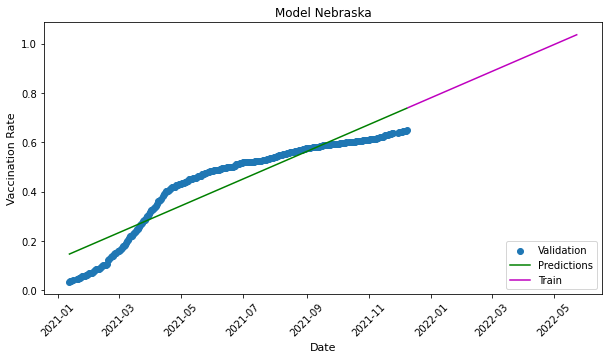

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Nevada
rmse:  0.05465191497809098
r2:  0.9181777452096028


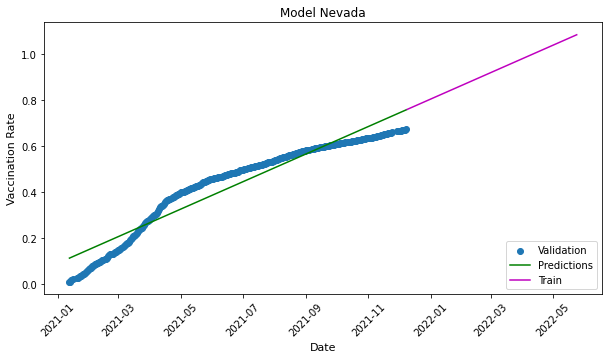

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
New Hampshire
rmse:  0.07980472868143666
r2:  0.8969882442423432


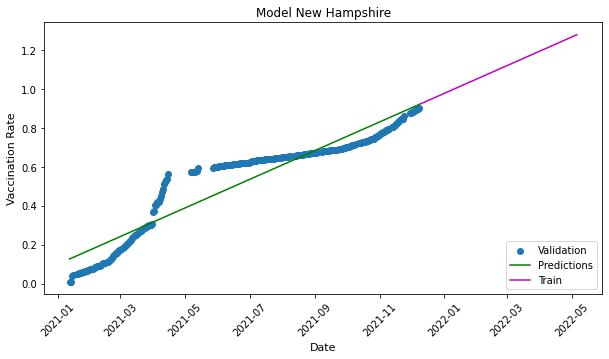

Observations in Actual Data = 360.000000, Predicted Observations=149.000000
New Jersey
rmse:  0.08376591342706949
r2:  0.8740953794080786


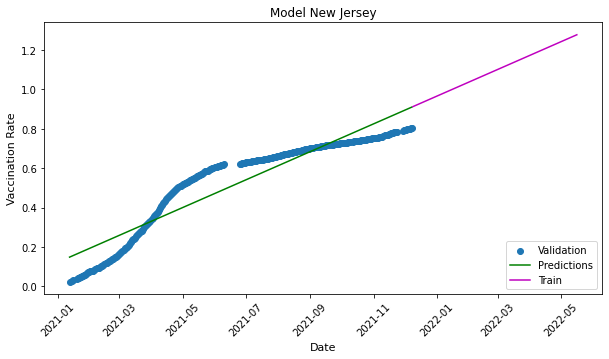

Observations in Actual Data = 360.000000, Predicted Observations=159.000000
New Mexico
rmse:  0.07988983052396227
r2:  0.8748563134275542


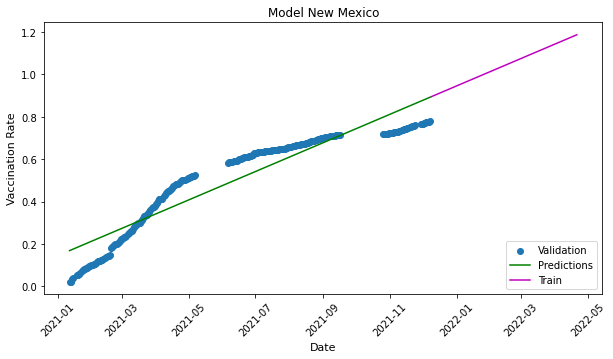

Observations in Actual Data = 360.000000, Predicted Observations=134.000000
New York State
rmse:  0.07250038281643528
r2:  0.9001236944860401


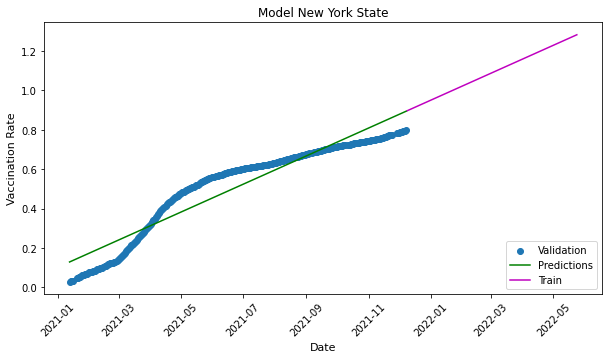

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
North Carolina
rmse:  0.0441357474452505
r2:  0.9450037722435564


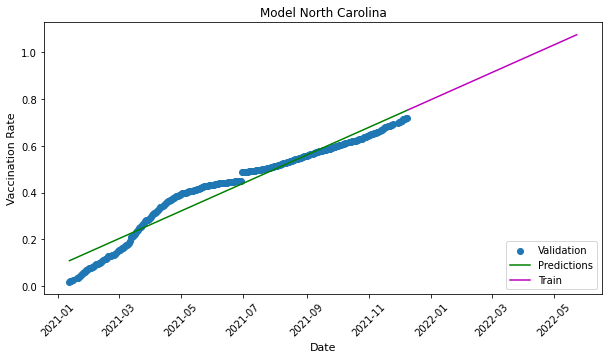

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
North Dakota
rmse:  0.052746985983294116
r2:  0.8623244483341586


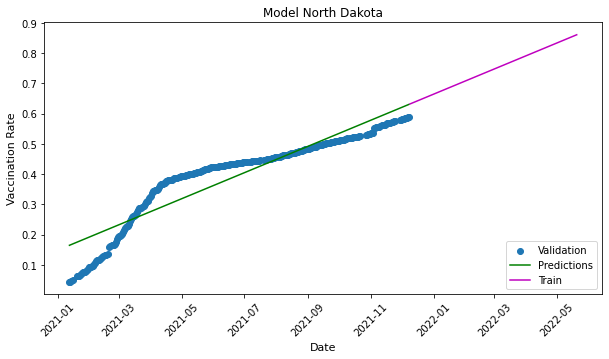

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
Northern Mariana Islands
rmse:  0.040337302517255307
r2:  0.9569895430955455


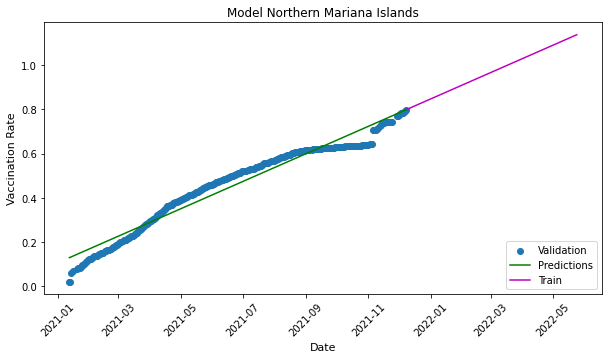

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Ohio
rmse:  0.06638532390013298
r2:  0.8400149767823377


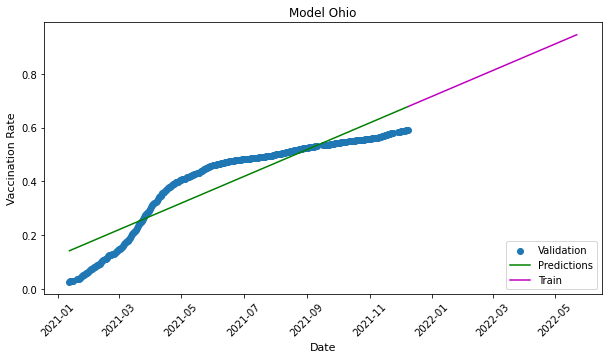

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Oklahoma
rmse:  0.04497056551838025
r2:  0.924652038481981


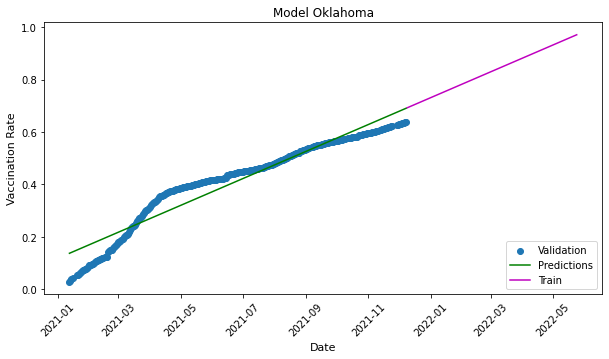

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Oregon
rmse:  0.07553216099451529
r2:  0.8746928170218358


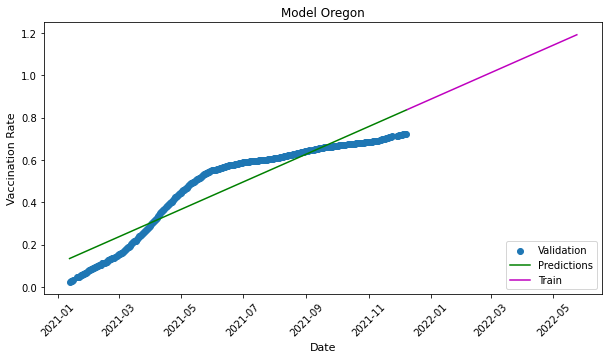

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Pennsylvania
rmse:  0.07712196974533062
r2:  0.8926792175260813


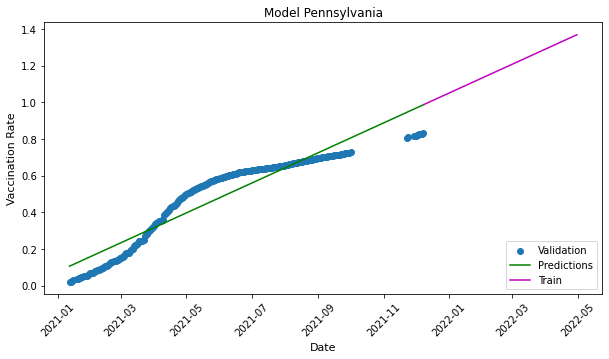

Observations in Actual Data = 360.000000, Predicted Observations=143.000000
Puerto Rico
rmse:  0.05835270592984121
r2:  0.9547996041475425


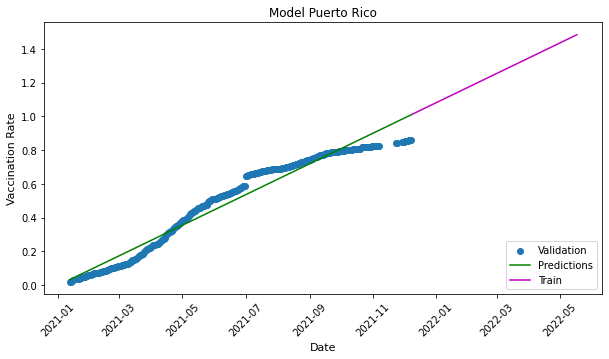

Observations in Actual Data = 360.000000, Predicted Observations=160.000000
Republic of Palau
rmse:  0.11765254825949033
r2:  0.8046481751702074


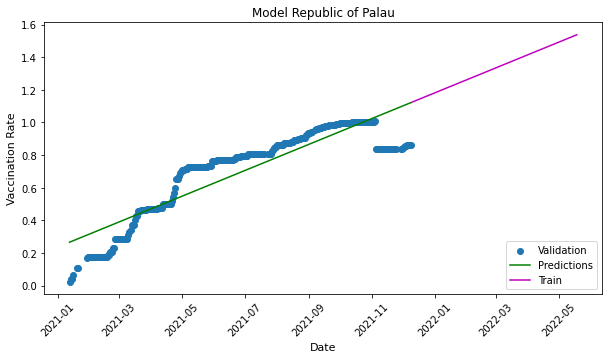

Observations in Actual Data = 360.000000, Predicted Observations=161.000000
Rhode Island
rmse:  0.08278068296220464
r2:  0.8842985381786748


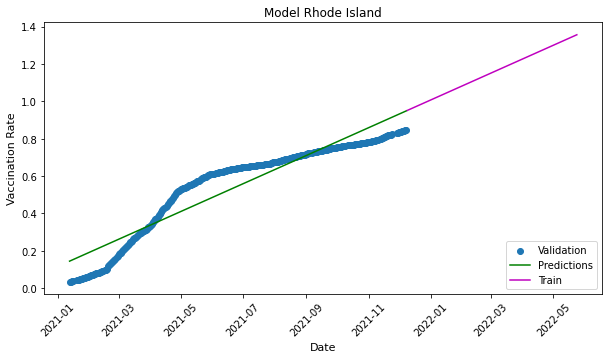

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
South Carolina
rmse:  0.04696508226632495
r2:  0.9213816366013515


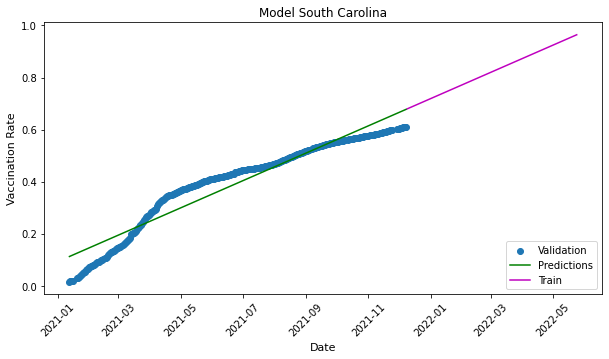

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
South Dakota
rmse:  0.0628269096033607
r2:  0.8662697031083249


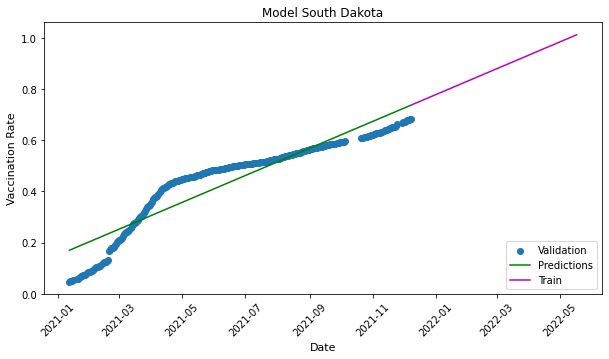

Observations in Actual Data = 360.000000, Predicted Observations=160.000000
Tennessee
rmse:  0.04481324819681424
r2:  0.921269662135946


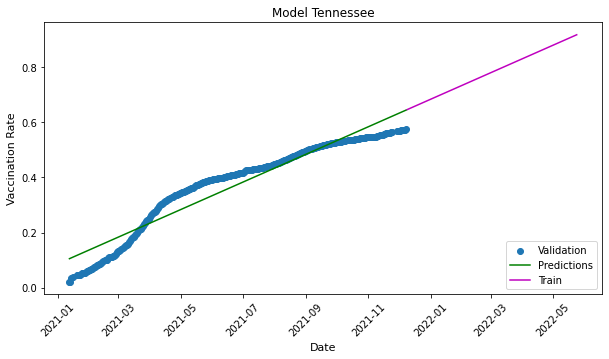

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Texas
rmse:  0.05394868952241643
r2:  0.9162136817863084


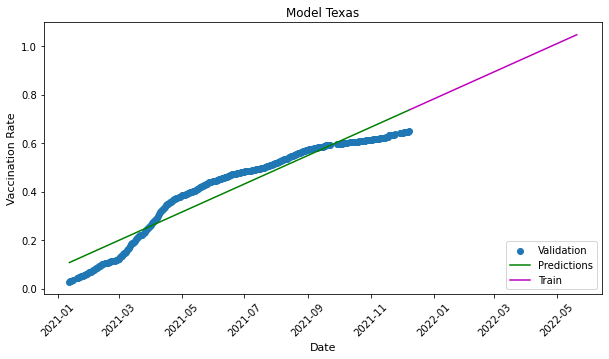

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
United States
rmse:  0.0648557478069161
r2:  0.8973752044541923


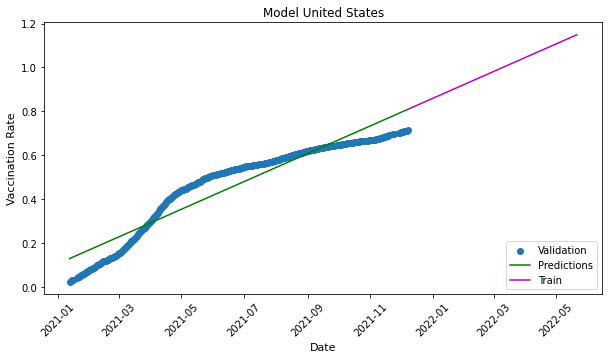

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Utah
rmse:  0.05645695890212405
r2:  0.9076216912505601


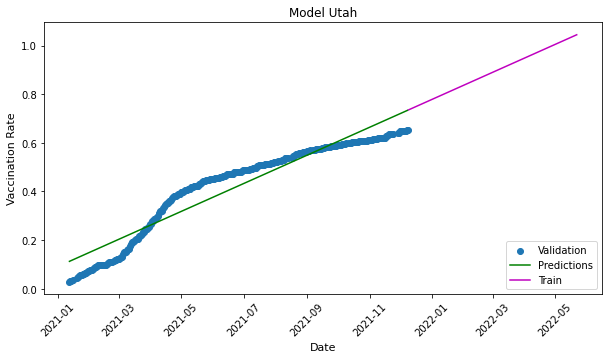

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Vermont
rmse:  0.11028674142954593
r2:  0.8295084826372607


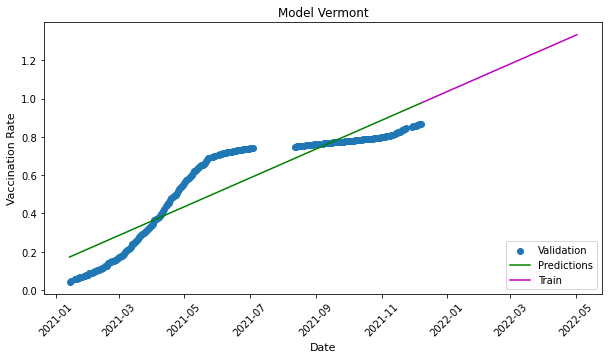

Observations in Actual Data = 360.000000, Predicted Observations=145.000000
Virgin Islands
rmse:  0.04001700610756507
r2:  0.9359524487200798


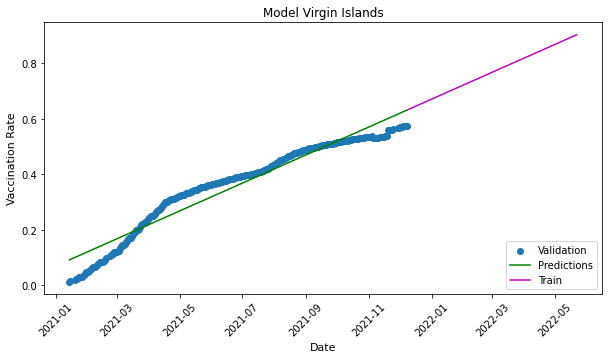

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Virginia
rmse:  0.07319642491572341
r2:  0.8848215311922664


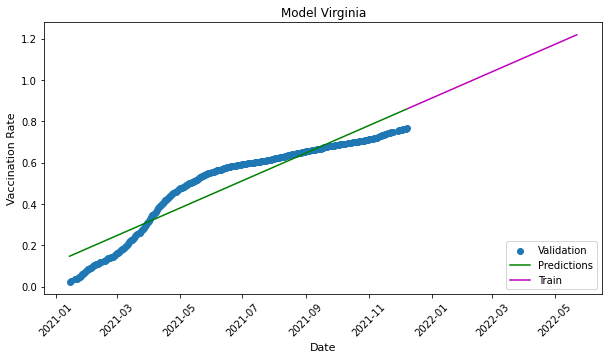

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Washington
rmse:  0.0872354358996786
r2:  0.8478984259688478


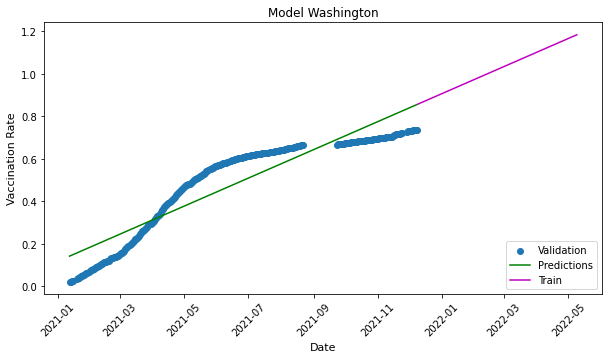

Observations in Actual Data = 360.000000, Predicted Observations=152.000000
West Virginia
rmse:  0.05302311433163171
r2:  0.849926851949254


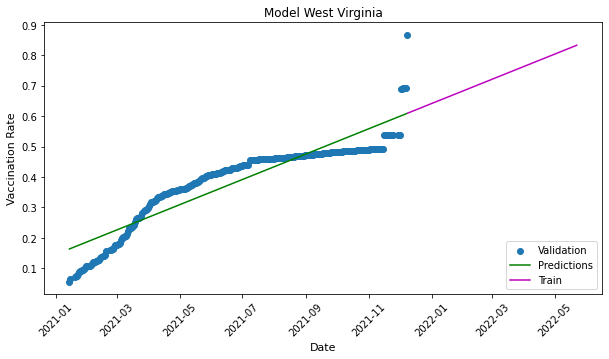

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Wisconsin
rmse:  0.07362286111959786
r2:  0.8449588958092012


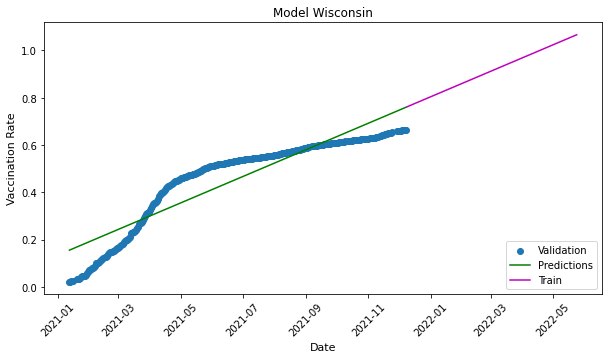

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Wyoming
rmse:  0.04057990706928117
r2:  0.9125276538739286


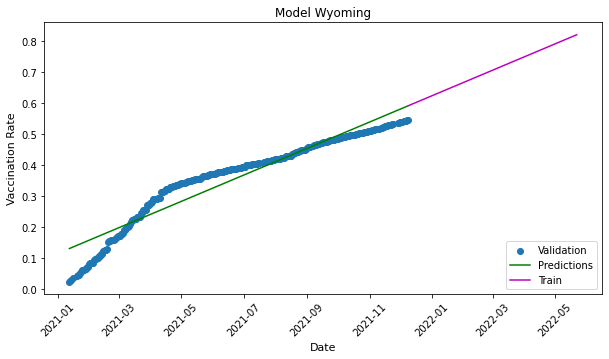

Observations in Actual Data = 360.000000, Predicted Observations=165.000000


In [19]:
for state_name in list_of_states:
  if(state_name in ['Bureau of Prisons','Dept of Defense','Long Term Care','Veterans Health']):
    continue
  df_state = df_all_states[df_all_states["location"] == state_name]
  df_state.dropna(inplace=True)
  df_state['date'] = pd.to_datetime(df_state['date'])
  df_state['people_vaccinated_per_hundred'] = df_state['people_vaccinated_per_hundred']/100
  df_state.rename(columns={'people_vaccinated_per_hundred': 'vaccination_rate'}, inplace=True)
  model, polynomial_features, predict_dates, group_export = linear(state_name, df_state)
  group_export['Location'] = state_name
  Predictions = model.predict(np.array(predict_dates).reshape(-1,1))
  Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
  Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
  Predictions_df['Location'] = state_name

    # Plot current observed, predicted and future predicted data
  plt.figure(figsize=(10,5))
  plt.xticks(rotation=45)
  plt.title('Model ' + state_name)
  plt.xlabel('Date', fontsize=11)
  plt.ylabel('Vaccination Rate', fontsize=11)
  plt.scatter(group_export.index, group_export['vaccination_rate'])
  plt.plot(group_export['Pred'], color = 'g')
  plt.plot(Predictions_df[['Predictions']], color = 'm')
  plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
  plt.show()
    # View the Actual vs Predicted data and their data count
  print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(df_by_date), len(Predictions)))
  

Alabama
Alabama
rmse:  0.01495912156802182
r2:  0.9913754652950005


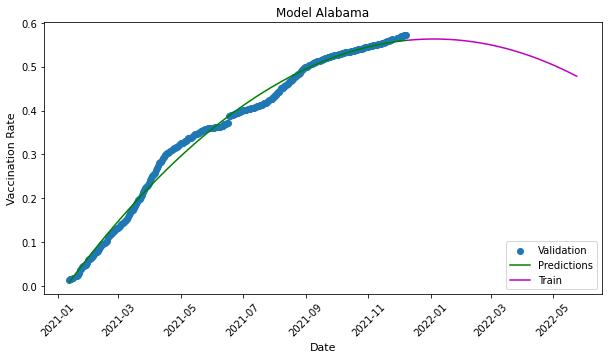

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Alaska
Alaska
rmse:  0.02127861035738432
r2:  0.9807525986867591


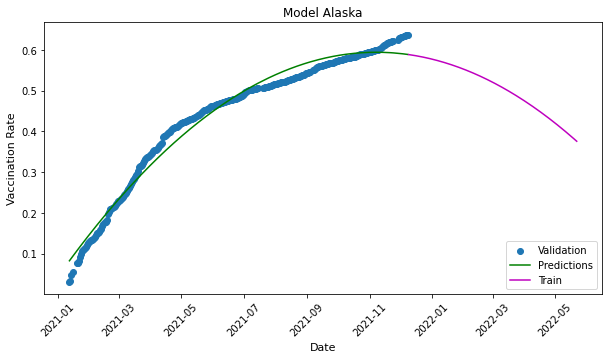

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
American Samoa
American Samoa
rmse:  0.027760112531064262
r2:  0.9753471112728097


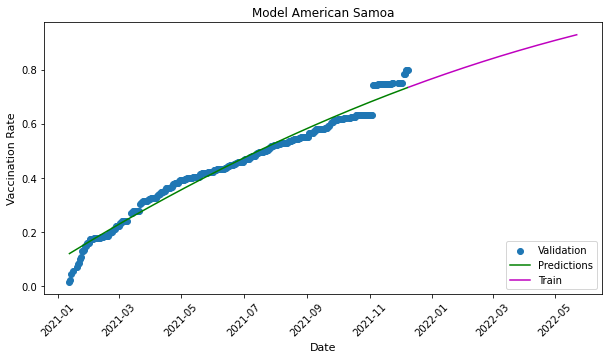

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Arizona
Arizona
rmse:  0.019452120754574875
r2:  0.9883746079096026


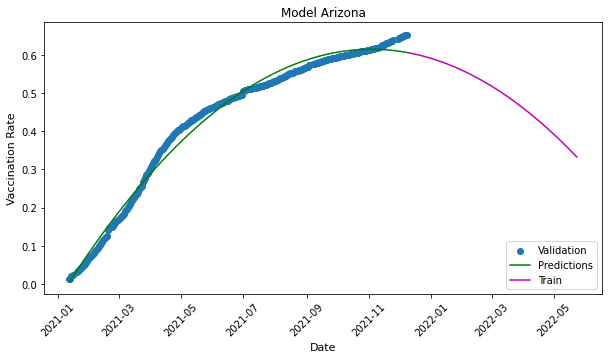

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Arkansas
Arkansas
rmse:  0.01799766011870592
r2:  0.9885536590819765


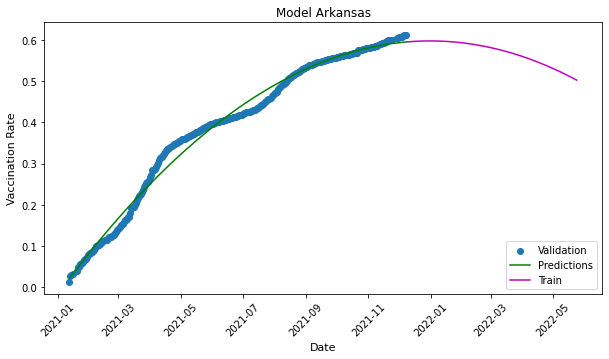

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
California
California
rmse:  0.029114018163742147
r2:  0.9844338173357222


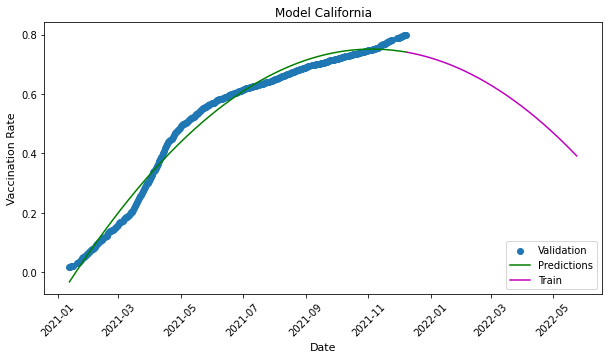

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Colorado
Colorado
rmse:  0.0292833775948079
r2:  0.9799804242432453


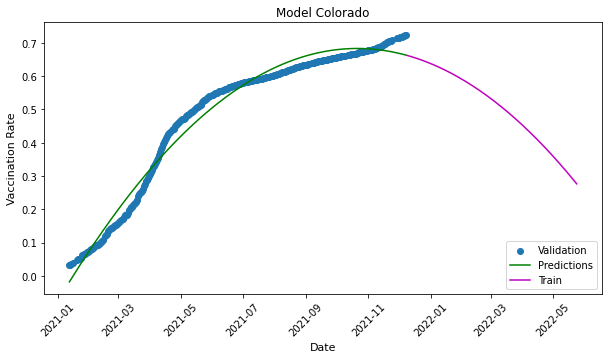

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Connecticut
Connecticut
rmse:  0.03384228149588872
r2:  0.9799143726258566


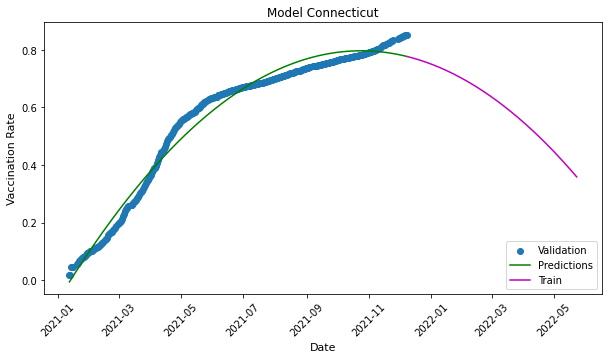

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Delaware
Delaware
rmse:  0.0294868918856462
r2:  0.9803177322519766


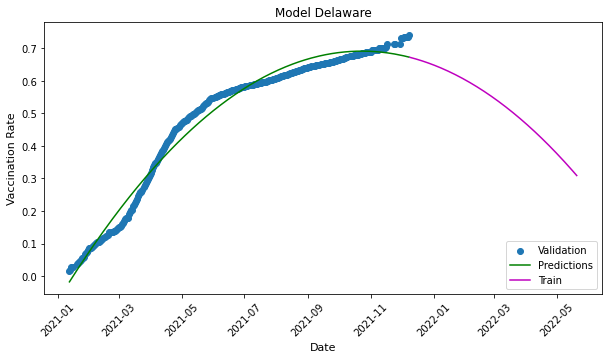

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
District of Columbia
District of Columbia
rmse:  0.04218173303326393
r2:  0.965261083049967


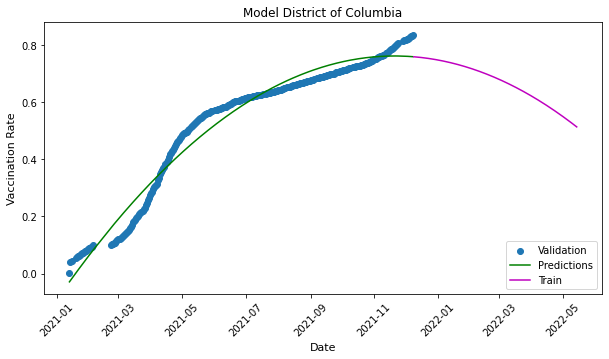

Observations in Actual Data = 360.000000, Predicted Observations=157.000000
Federated States of Micronesia
Federated States of Micronesia
rmse:  0.010037373391414004
r2:  0.9948094804369861


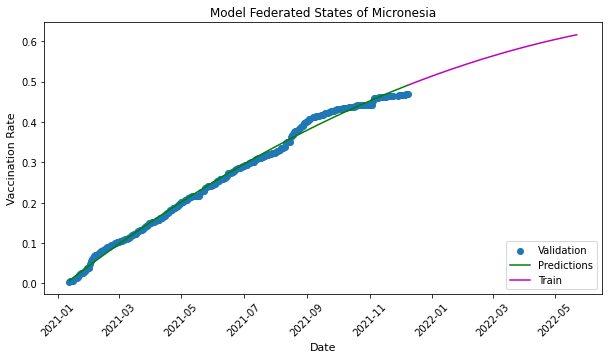

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Florida
Florida
rmse:  0.018792229142509165
r2:  0.9919490412358185


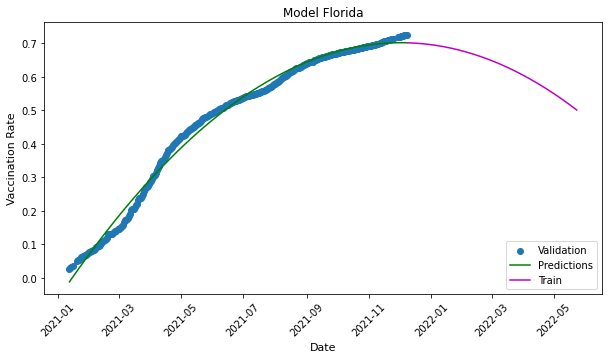

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Georgia
Georgia
rmse:  0.019390183042634172
r2:  0.9870274875335988


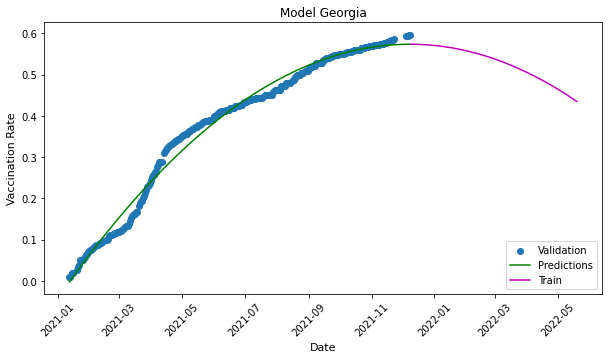

Observations in Actual Data = 360.000000, Predicted Observations=162.000000
Guam
Guam
rmse:  0.018447857617286685
r2:  0.9938283145791275


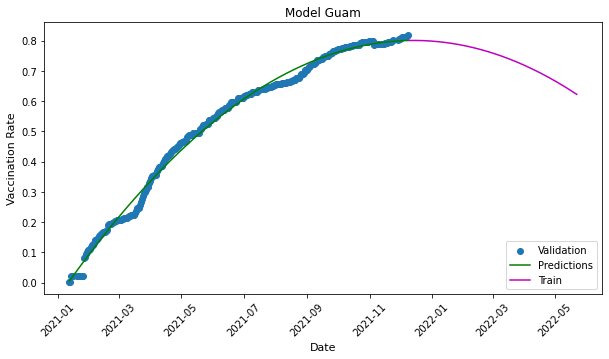

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Hawaii
Hawaii
rmse:  0.039964994983643365
r2:  0.974297027701483


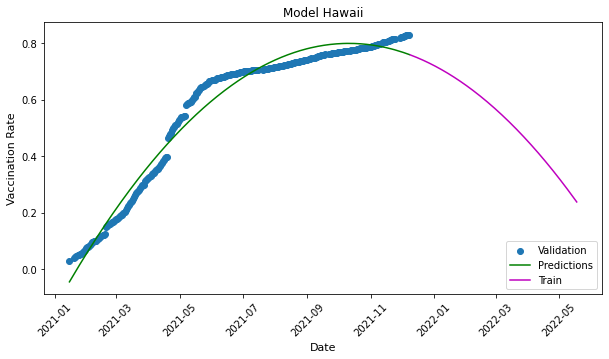

Observations in Actual Data = 360.000000, Predicted Observations=161.000000
Idaho
Idaho
rmse:  0.021906636586834033
r2:  0.9752906467291867


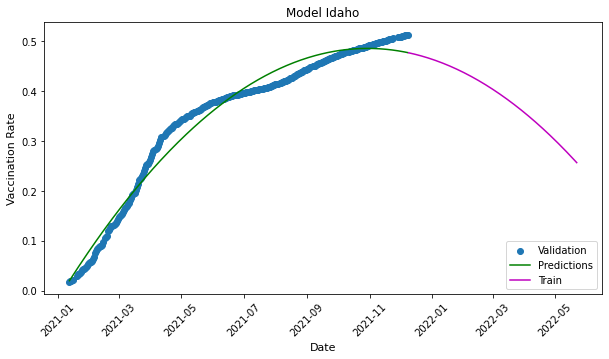

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Illinois
Illinois
rmse:  0.024858521675645638
r2:  0.9863759683451737


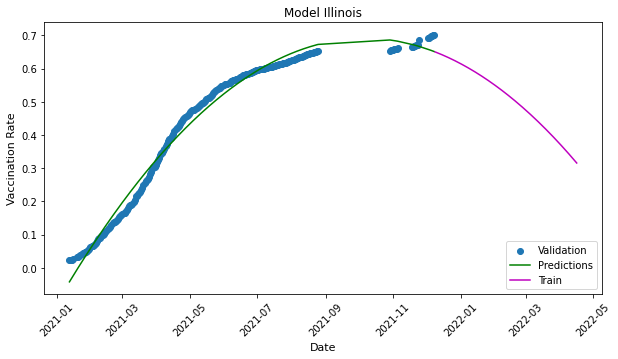

Observations in Actual Data = 360.000000, Predicted Observations=129.000000
Indian Health Svc
Indian Health Svc
rmse:  0.01900470319183606
r2:  0.9425382183753288


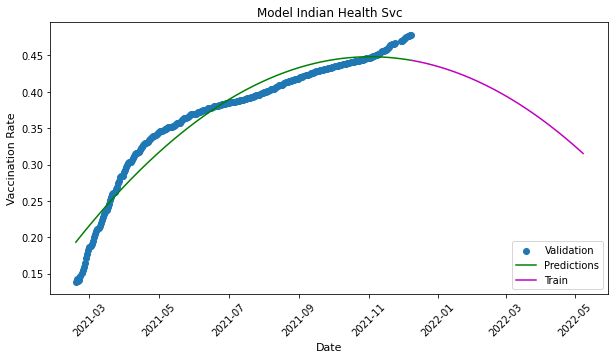

Observations in Actual Data = 360.000000, Predicted Observations=151.000000
Indiana
Indiana
rmse:  0.016543675811231486
r2:  0.9888936170974385


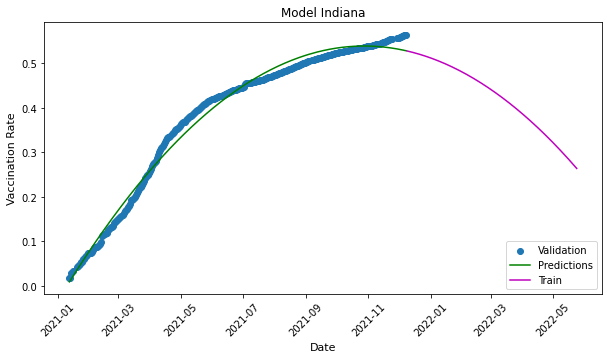

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Iowa
Iowa
rmse:  0.028757591302907996
r2:  0.9733327737854214


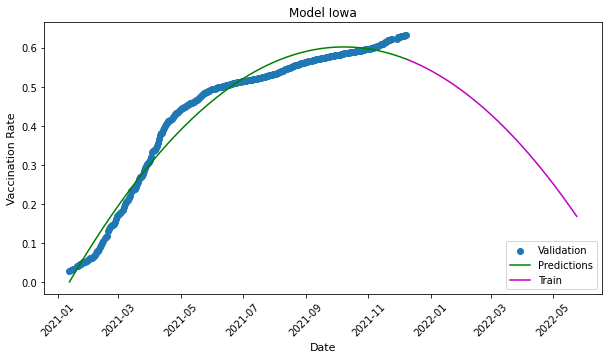

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Kansas
Kansas
rmse:  0.02871967937675642
r2:  0.9764073860552105


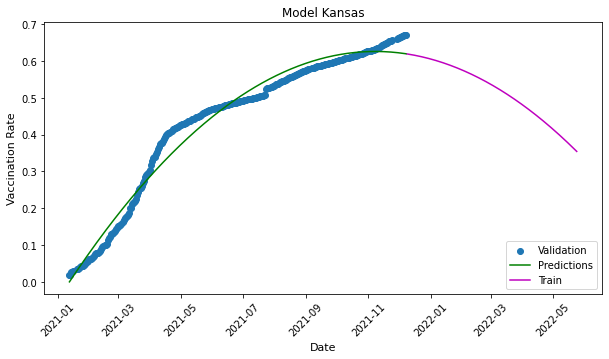

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Kentucky
Kentucky
rmse:  0.022580021227305205
r2:  0.9829518124812532


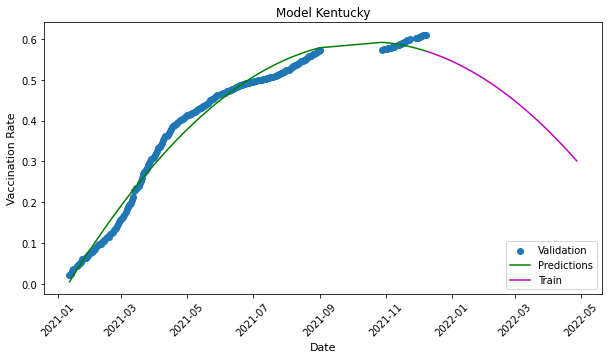

Observations in Actual Data = 360.000000, Predicted Observations=140.000000
Louisiana
Louisiana
rmse:  0.017466659786247254
r2:  0.9866756323997934


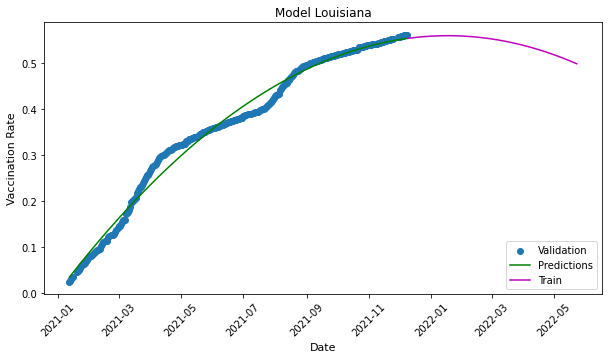

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Maine
Maine
rmse:  0.03963967604634694
r2:  0.9724574907951294


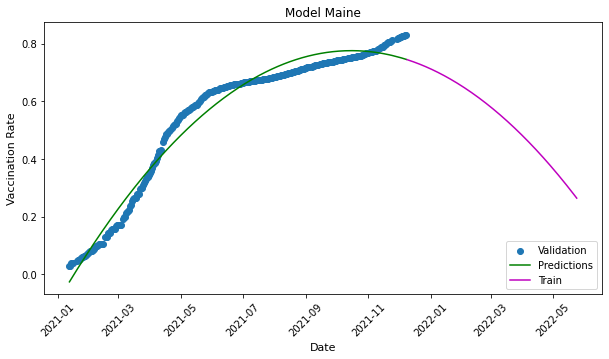

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Marshall Islands
Marshall Islands
rmse:  0.01989611234962788
r2:  0.9613024197100679


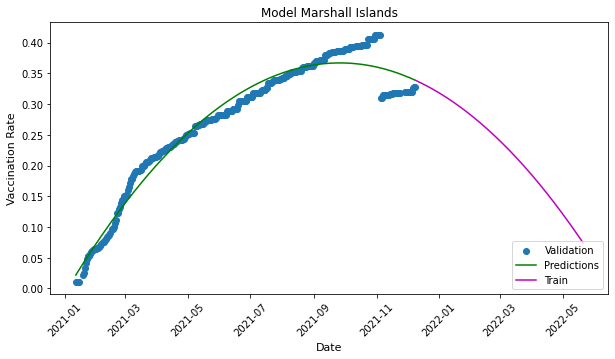

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Maryland
Maryland
rmse:  0.029983546137254527
r2:  0.9829701944692129


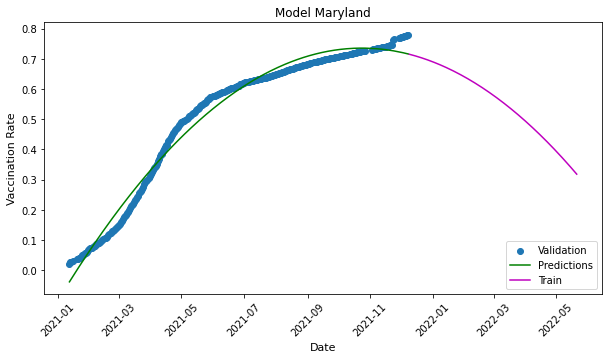

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Massachusetts
Massachusetts
rmse:  0.040404007307623745
r2:  0.9748766853892491


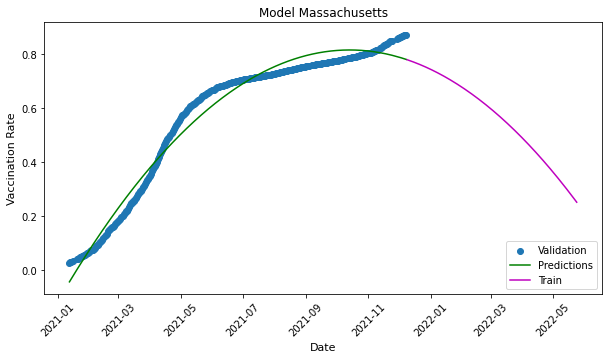

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Michigan
Michigan
rmse:  0.026999244021380164
r2:  0.9766047495216698


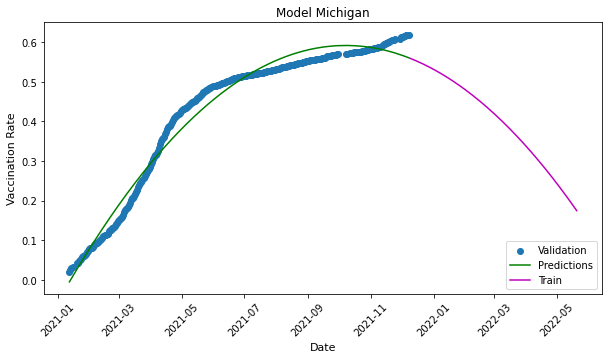

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
Minnesota
Minnesota
rmse:  0.029782228674562913
r2:  0.9776658847037399


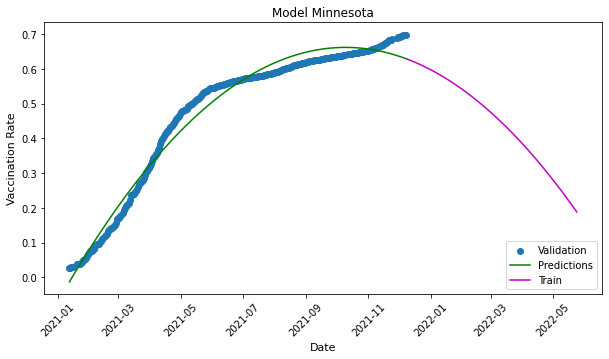

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Mississippi
Mississippi
rmse:  0.01820263514382041
r2:  0.9846290906630012


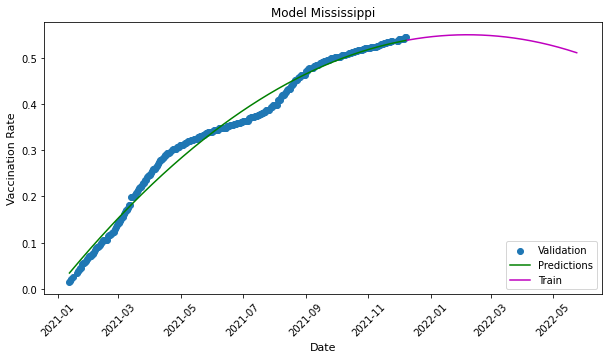

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Missouri
Missouri
rmse:  0.01941073633920549
r2:  0.9869576507807692


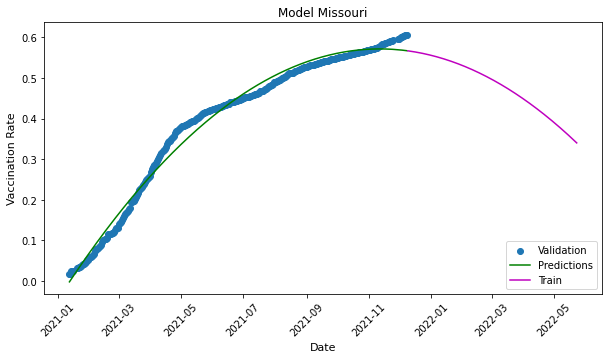

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Montana
Montana
rmse:  0.02581183066927826
r2:  0.9742541979906221


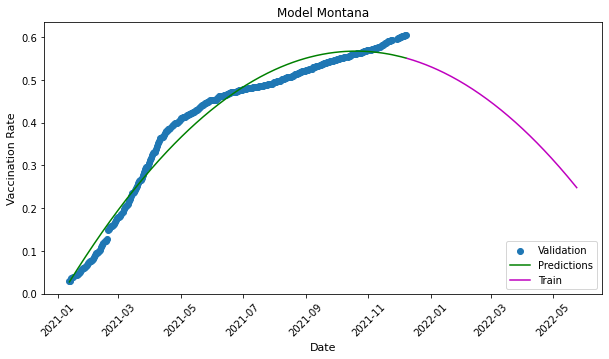

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Nebraska
Nebraska
rmse:  0.026324035065690823
r2:  0.9789343414090368


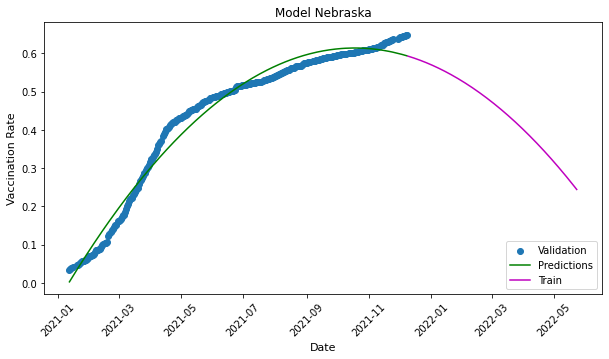

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
Nevada
Nevada
rmse:  0.017651454499575857
r2:  0.991464643399924


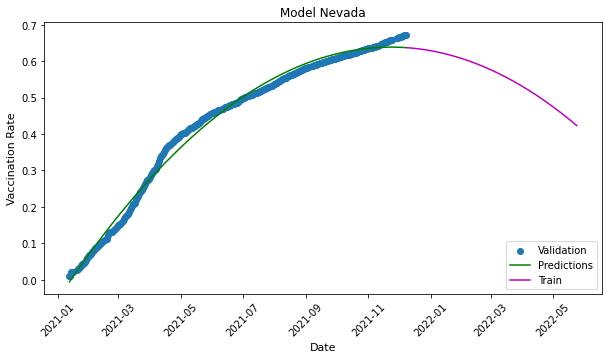

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
New Hampshire
New Hampshire
rmse:  0.05147087275984214
r2:  0.9571498246614559


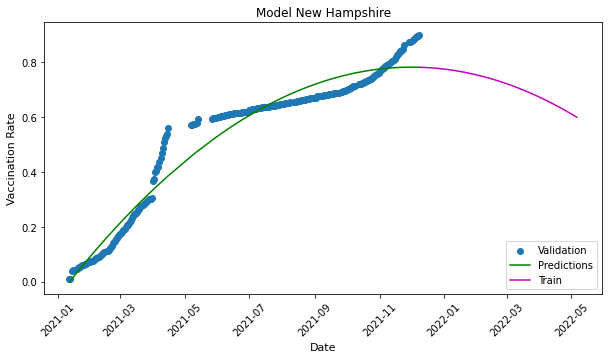

Observations in Actual Data = 360.000000, Predicted Observations=149.000000
New Jersey
New Jersey
rmse:  0.03429409914011166
r2:  0.9788969217450836


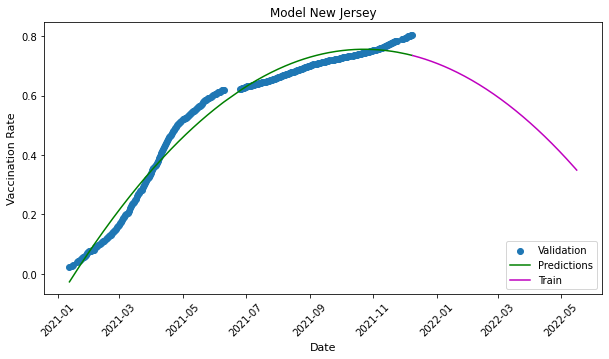

Observations in Actual Data = 360.000000, Predicted Observations=159.000000
New Mexico
New Mexico
rmse:  0.024977877375985256
r2:  0.9877668865542552


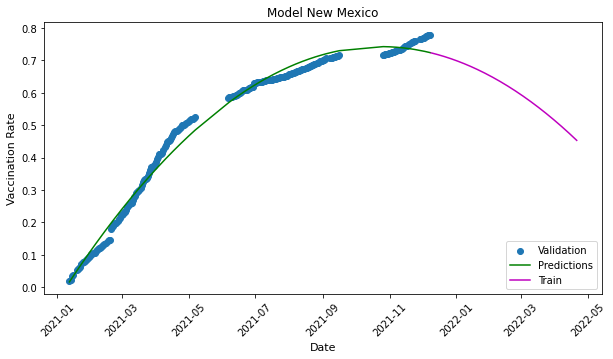

Observations in Actual Data = 360.000000, Predicted Observations=134.000000
New York State
New York State
rmse:  0.029782060276713436
r2:  0.9831464518467001


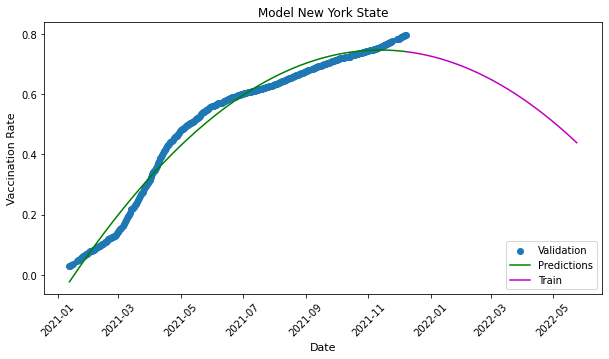

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
North Carolina
North Carolina
rmse:  0.024309952982229557
r2:  0.9833152321638262


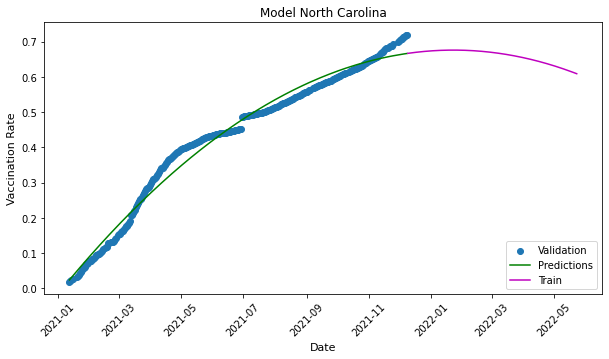

Observations in Actual Data = 360.000000, Predicted Observations=166.000000
North Dakota
North Dakota
rmse:  0.03076646444061728
r2:  0.9531600188604369


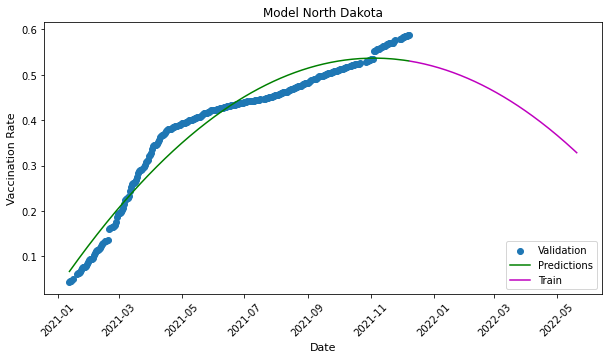

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
Northern Mariana Islands
Northern Mariana Islands
rmse:  0.022115372864819686
r2:  0.9870714778552574


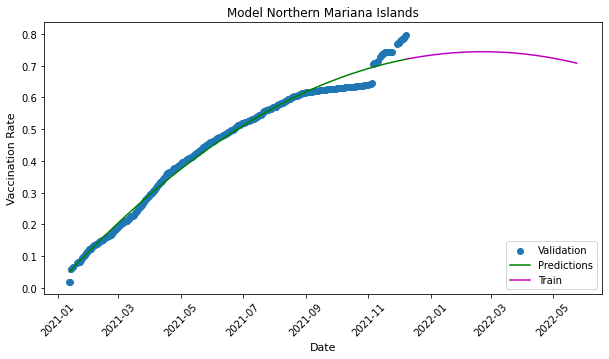

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Ohio
Ohio
rmse:  0.025937206137579733
r2:  0.975577981335962


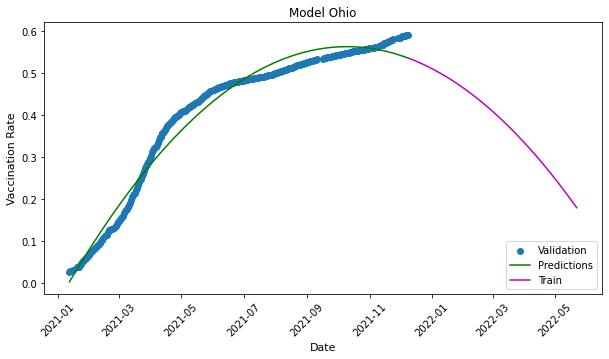

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Oklahoma
Oklahoma
rmse:  0.02380998035517324
r2:  0.9788781047984007


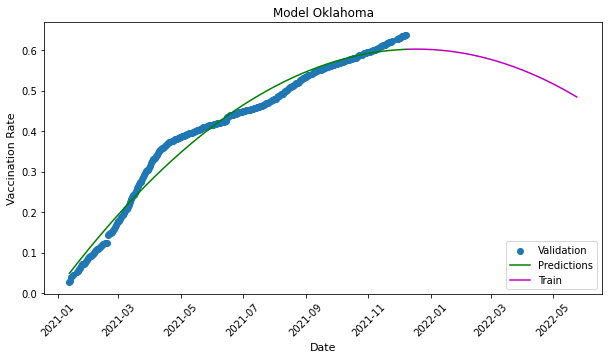

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Oregon
Oregon
rmse:  0.027604872939821633
r2:  0.9832627674068674


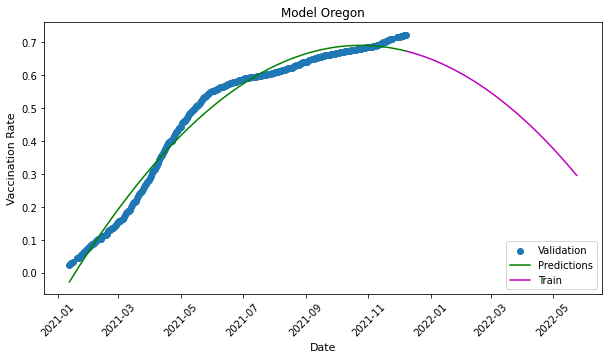

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Pennsylvania
Pennsylvania
rmse:  0.0357449825150607
r2:  0.9769453898920191


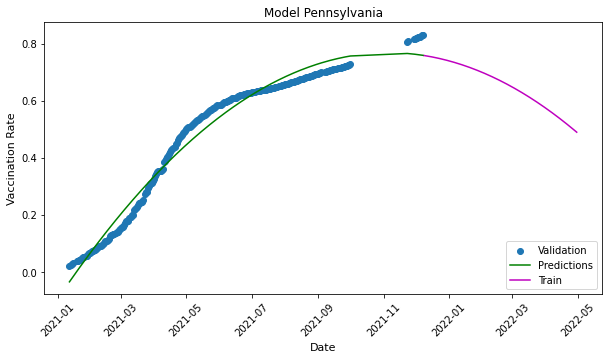

Observations in Actual Data = 360.000000, Predicted Observations=143.000000
Puerto Rico
Puerto Rico
rmse:  0.03179450840629776
r2:  0.9865808666893436


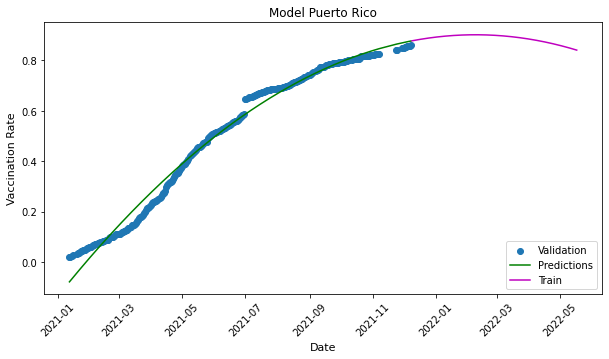

Observations in Actual Data = 360.000000, Predicted Observations=160.000000
Republic of Palau
Republic of Palau
rmse:  0.04620153622464492
r2:  0.9698749602326603


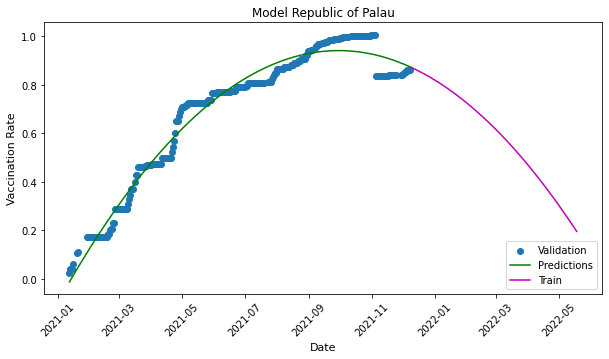

Observations in Actual Data = 360.000000, Predicted Observations=161.000000
Rhode Island
Rhode Island
rmse:  0.03419724681830445
r2:  0.980254727959156


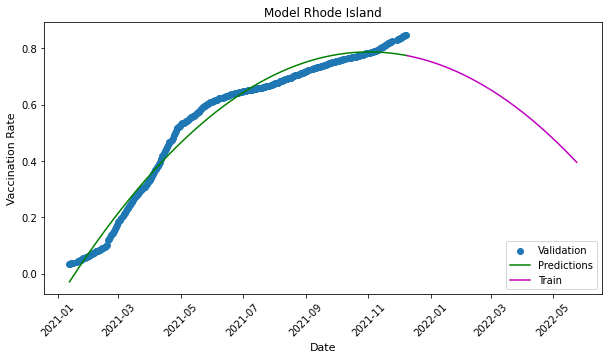

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
South Carolina
South Carolina
rmse:  0.020119181347944975
r2:  0.985572388659076


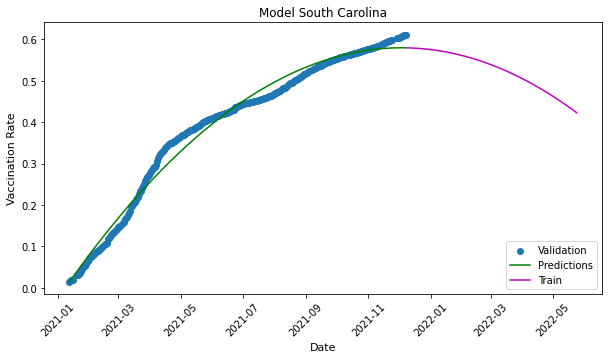

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
South Dakota
South Dakota
rmse:  0.033713855894726405
r2:  0.961491618502121


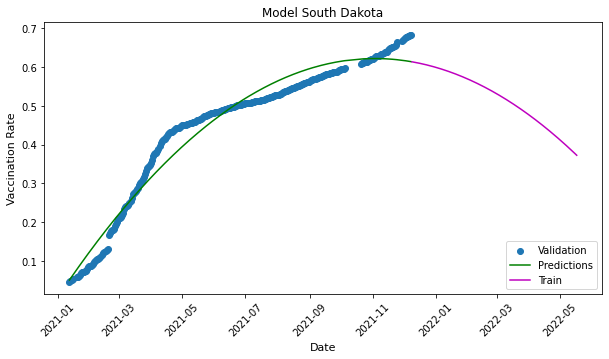

Observations in Actual Data = 360.000000, Predicted Observations=160.000000
Tennessee
Tennessee
rmse:  0.017888885222946703
r2:  0.9874542733039563


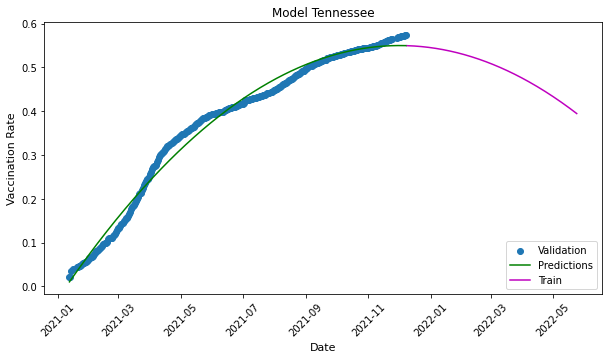

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Texas
Texas
rmse:  0.018700489763220758
r2:  0.9899326012808084


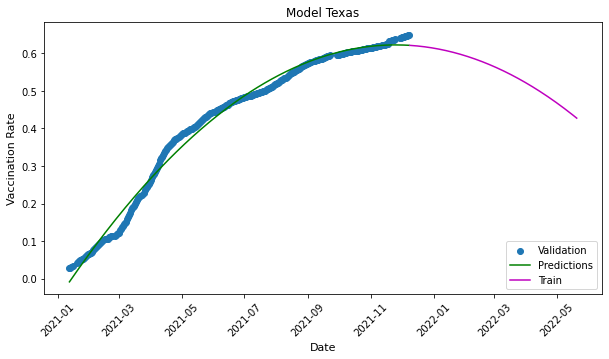

Observations in Actual Data = 360.000000, Predicted Observations=163.000000
United States
United States
rmse:  0.02362679871651051
r2:  0.9863803757743653


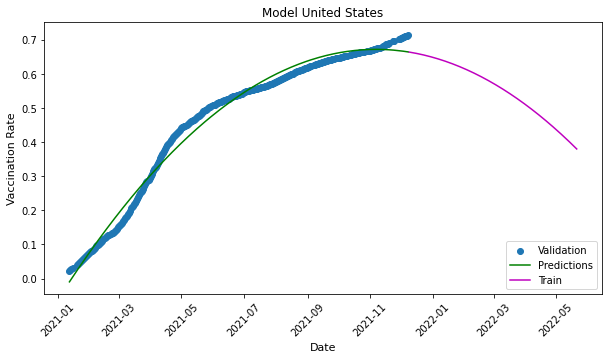

Observations in Actual Data = 360.000000, Predicted Observations=164.000000
Utah
Utah
rmse:  0.022310620120842593
r2:  0.9855735880796151


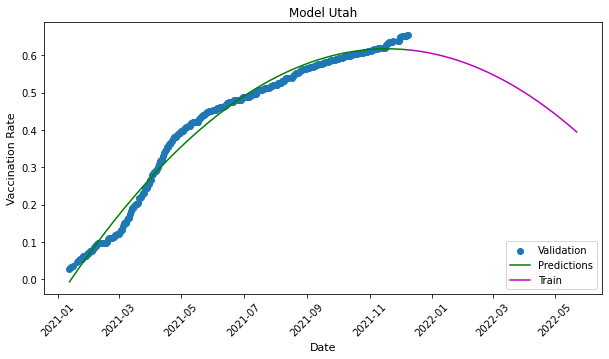

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Vermont
Vermont
rmse:  0.049126924825075996
r2:  0.9661705197748232


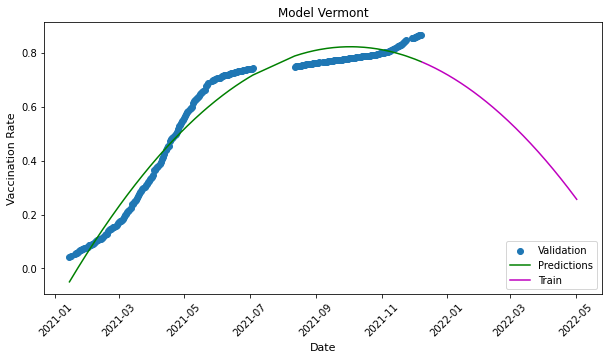

Observations in Actual Data = 360.000000, Predicted Observations=145.000000
Virgin Islands
Virgin Islands
rmse:  0.015819055878387788
r2:  0.9899913739469901


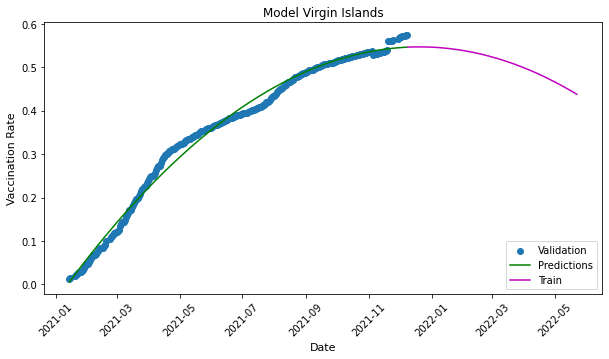

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Virginia
Virginia
rmse:  0.02882714049447664
r2:  0.9821353426423791


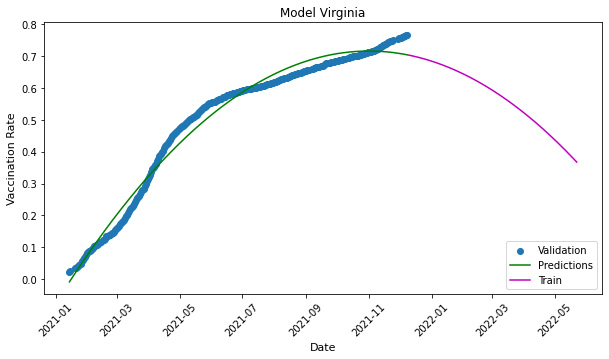

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Washington
Washington
rmse:  0.0278375495243264
r2:  0.9845114827870117


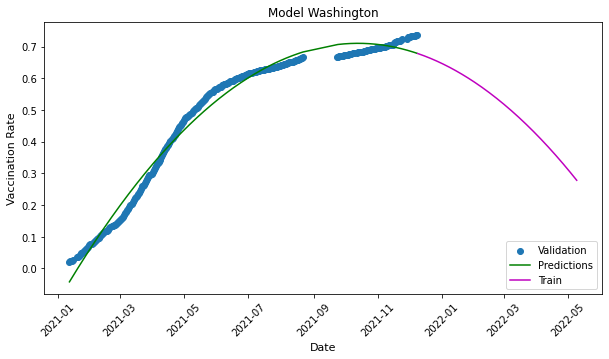

Observations in Actual Data = 360.000000, Predicted Observations=152.000000
West Virginia
West Virginia
rmse:  0.038246111099772
r2:  0.9219186898121592


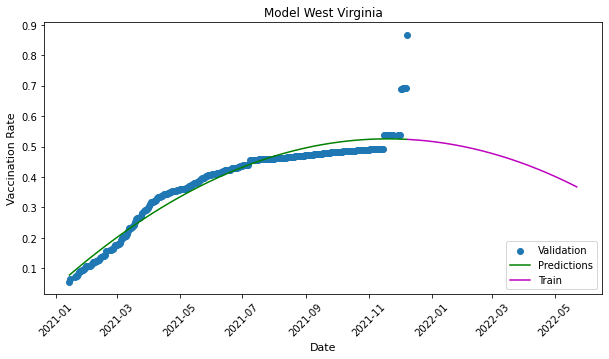

Observations in Actual Data = 360.000000, Predicted Observations=165.000000
Wisconsin
Wisconsin
rmse:  0.029363856307236744
r2:  0.9753369007154756


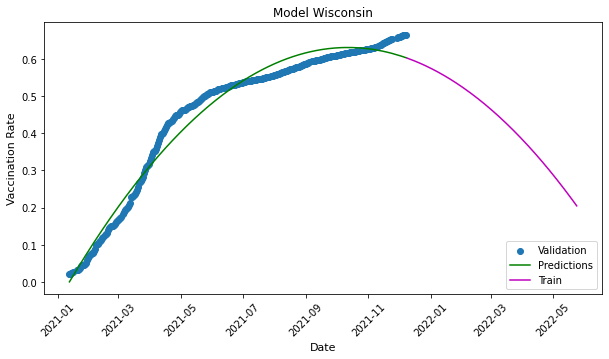

Observations in Actual Data = 360.000000, Predicted Observations=167.000000
Wyoming
Wyoming
rmse:  0.020539406158550707
r2:  0.9775908984459999


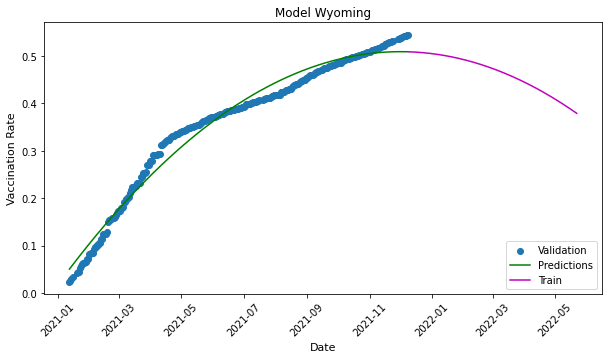

Observations in Actual Data = 360.000000, Predicted Observations=165.000000


In [20]:
for state_name in list_of_states:
  if(state_name in ['Bureau of Prisons','Dept of Defense','Long Term Care','Veterans Health']):
    continue
  df_state = df_all_states[df_all_states["location"] == state_name]
  df_state.dropna(inplace=True)
  df_state['date'] = pd.to_datetime(df_state['date'])
  df_state['people_vaccinated_per_hundred'] = df_state['people_vaccinated_per_hundred']/100
  df_state.rename(columns={'people_vaccinated_per_hundred': 'vaccination_rate'}, inplace=True)
  model, polynomial_features, predict_dates, group_export = poly(state_name, df_state)
  group_export['Location'] = state_name
  Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))
  Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
  Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
  Predictions_df['Location'] = state_name

    # Plot current observed, predicted and future predicted data
  plt.figure(figsize=(10,5))
  plt.xticks(rotation=45)
  plt.title('Model ' + state_name)
  plt.xlabel('Date', fontsize=11)
  plt.ylabel('Vaccination Rate', fontsize=11)
  plt.scatter(group_export.index, group_export['vaccination_rate'])
  plt.plot(group_export['Pred'], color = 'g')
  plt.plot(Predictions_df[['Predictions']], color = 'm')
  plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
  plt.show()
    # View the Actual vs Predicted data and their data count
  print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(df_by_date), len(Predictions)))